In [126]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.utils import shuffle

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame with the original Iris data
df_original = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_original['species'] = iris.target_names[iris.target]

# Repeat the original dataset to have 500 samples
df_synthetic = pd.concat([df_original] * (500 // len(iris.target)), ignore_index=True)

# Shuffle the synthetic dataset
df_synthetic = shuffle(df_synthetic, random_state=42).reset_index(drop=True)

# Display the first few rows of the synthetic DataFrame
print(df_synthetic)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  7.3               2.9                6.3               1.8   
1                  6.7               3.3                5.7               2.5   
2                  7.7               3.8                6.7               2.2   
3                  4.8               3.1                1.6               0.2   
4                  6.4               3.2                5.3               2.3   
..                 ...               ...                ...               ...   
445                4.9               2.5                4.5               1.7   
446                6.9               3.2                5.7               2.3   
447                5.3               3.7                1.5               0.2   
448                7.7               3.0                6.1               2.3   
449                7.1               3.0                5.9               2.1   

       species  
0    virgi

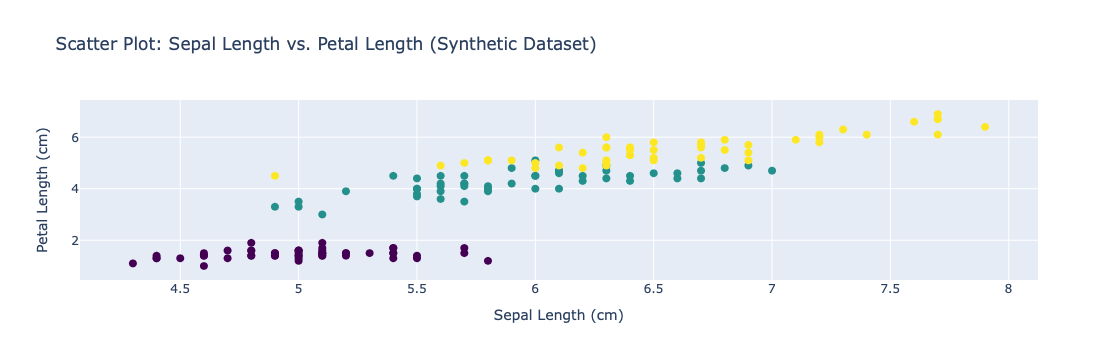

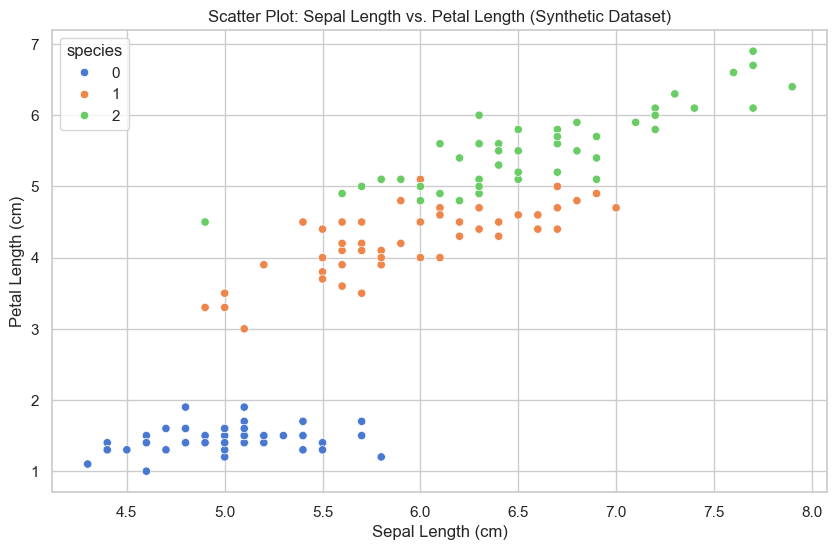

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.datasets import load_iris
import pandas as pd

# Load the synthetic dataset
iris = load_iris()
df_synthetic = pd.concat([pd.DataFrame(iris.data, columns=iris.feature_names), pd.Series(iris.target, name='species')], axis=1)

# Scatter Plot
plt.figure(figsize=(10, 6))
scatter_ax = sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', data=df_synthetic, hue='species', palette='muted')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Scatter Plot: Sepal Length vs. Petal Length (Synthetic Dataset)')

# Extract data from Seaborn axis
scatter_data = scatter_ax.get_children()[0].get_offsets()

# Create a Plotly scatter trace
scatter_trace = go.Scatter(
    x=scatter_data[:, 0],
    y=scatter_data[:, 1],
    mode='markers',
    marker=dict(color=df_synthetic['species'], colorscale='Viridis', size=8),
    showlegend=False,
)

# Create a Plotly figure
chart_one = go.Figure(data=[scatter_trace])

# Update layout of the Plotly figure
chart_one.update_layout(
    title_text='Scatter Plot: Sepal Length vs. Petal Length (Synthetic Dataset)',
    xaxis_title='Sepal Length (cm)',
    yaxis_title='Petal Length (cm)',
)

# Show the Plotly figure
chart_one.show()


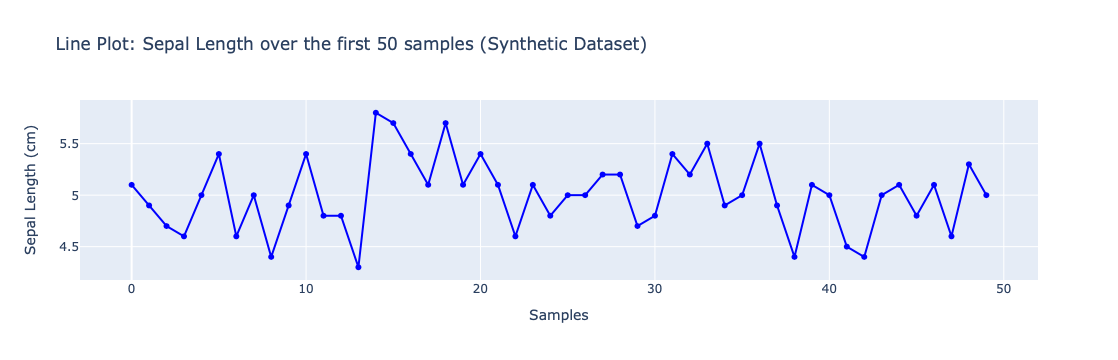

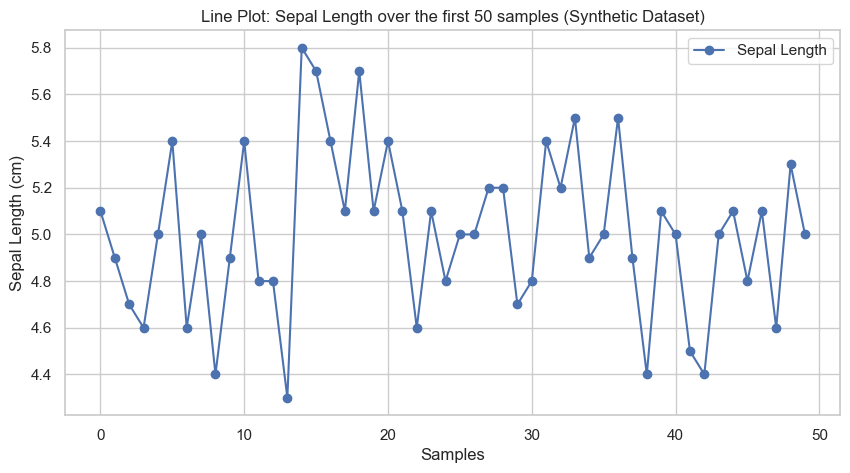

In [128]:
plt.figure(figsize=(10, 5))
line_plot = plt.plot(df_synthetic.index[:50], df_synthetic['sepal length (cm)'][:50], marker='o', linestyle='-', color='b', label='Sepal Length')
plt.xlabel('Samples')
plt.ylabel('Sepal Length (cm)')
plt.title('Line Plot: Sepal Length over the first 50 samples (Synthetic Dataset)')
plt.legend()

# Extract data from Matplotlib line plot
line_data = line_plot[0].get_xydata()

# Create a Plotly line trace
line_trace = go.Scatter(
    x=line_data[:, 0],
    y=line_data[:, 1],
    mode='lines+markers',
    marker=dict(color='blue'),
    line=dict(color='blue', width=2),
    name='Sepal Length'
)

# Create a Plotly figure
chart_two = go.Figure(data=[line_trace])

# Update layout of the Plotly figure
chart_two.update_layout(
    title_text='Line Plot: Sepal Length over the first 50 samples (Synthetic Dataset)',
    xaxis_title='Samples',
    yaxis_title='Sepal Length (cm)',
)

# Show the Plotly figure
chart_two.show()

/var/folders/8x/_35lzhpn3_z2h2dp_j_4ysrm0000gn/T/ipykernel_2761/2983603059.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




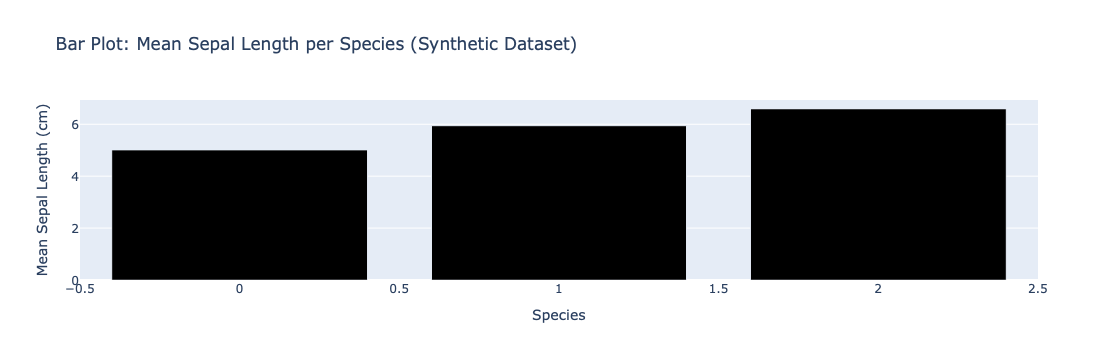

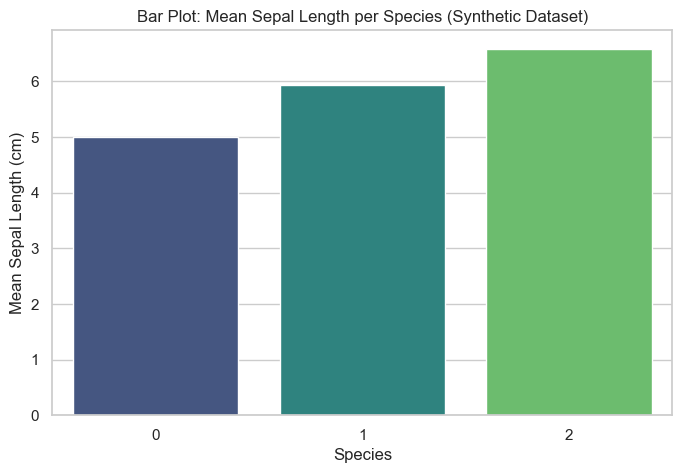

In [129]:
mean_sepal_length = df_synthetic.groupby('species')['sepal length (cm)'].mean()

# Bar Plot
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x=mean_sepal_length.index, y=mean_sepal_length.values, palette='viridis')
plt.xlabel('Species')
plt.ylabel('Mean Sepal Length (cm)')
plt.title('Bar Plot: Mean Sepal Length per Species (Synthetic Dataset)')

# Extract data from Seaborn bar plot
bar_data = [patch.get_height() for patch in bar_plot.patches]

# Create a Plotly bar trace
bar_trace = go.Bar(
    x=mean_sepal_length.index,
    y=bar_data,
    marker=dict(color=sns.color_palette('viridis')),
    name='Mean Sepal Length'
)

# Create a Plotly figure
chart_three = go.Figure(data=[bar_trace])

# Update layout of the Plotly figure
chart_three.update_layout(
    title_text='Bar Plot: Mean Sepal Length per Species (Synthetic Dataset)',
    xaxis_title='Species',
    yaxis_title='Mean Sepal Length (cm)',
)

# Show the Plotly figure
chart_three.show()

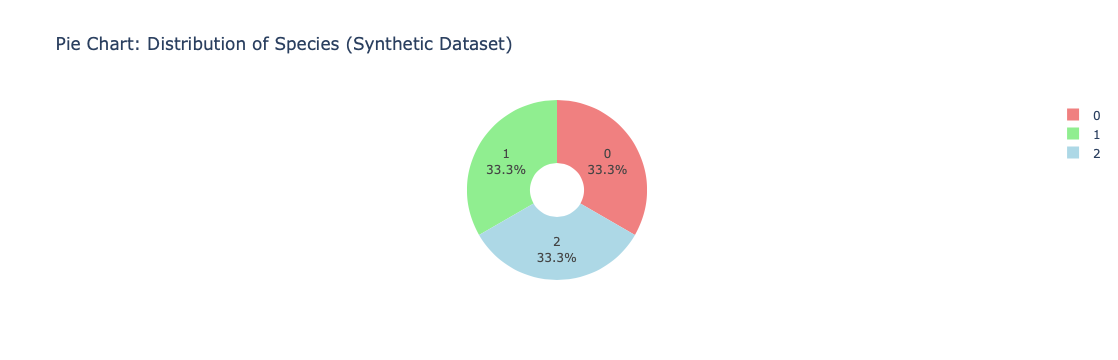

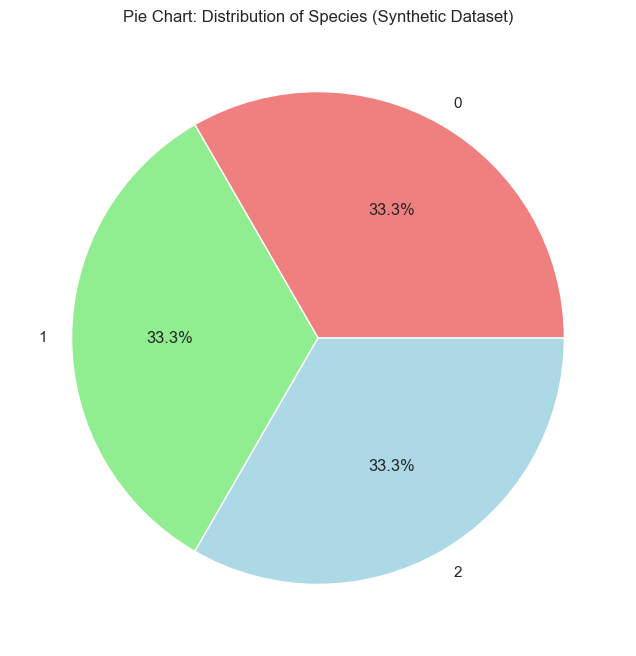

In [130]:
species_distribution = df_synthetic['species'].value_counts()

# Pie Chart
plt.figure(figsize=(8, 8))
pie_chart = plt.pie(species_distribution, labels=species_distribution.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightblue'])
plt.title('Pie Chart: Distribution of Species (Synthetic Dataset)')

# Extract data from Matplotlib pie chart
pie_data = [patch.theta2 - patch.theta1 for patch in pie_chart[0]]

# Create a Plotly pie trace
pie_trace = go.Pie(
    labels=species_distribution.index,
    values=pie_data,
    marker=dict(colors=['lightcoral', 'lightgreen', 'lightblue']),
    textinfo='percent+label',
    hole=0.3,
)

# Create a Plotly figure
chart_four = go.Figure(data=[pie_trace])

# Update layout of the Plotly figure
chart_four.update_layout(
    title_text='Pie Chart: Distribution of Species (Synthetic Dataset)',
)

# Show the Plotly figure
chart_four.show()

<IPython.core.display.Javascript object>

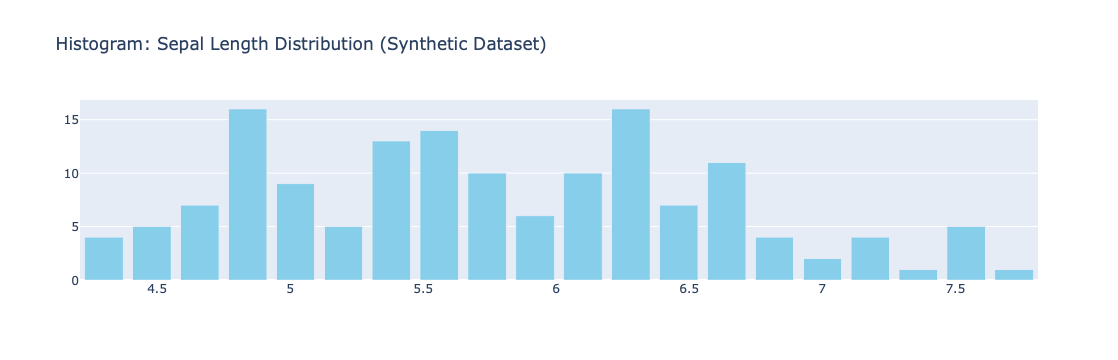

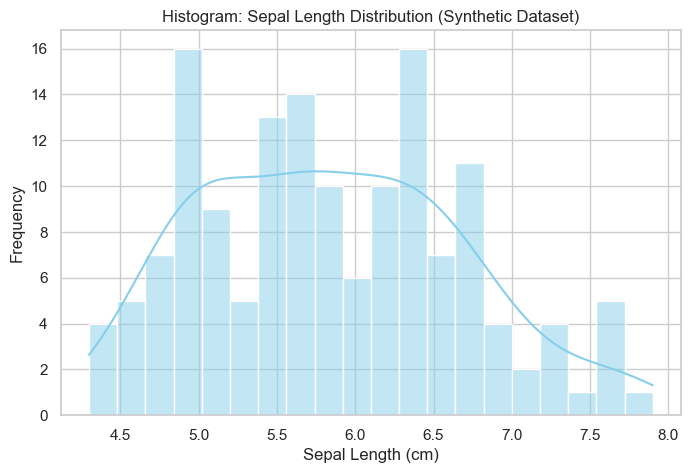

In [131]:
plt.figure(figsize=(8, 5))
ax = sns.histplot(df_synthetic, x='sepal length (cm)', kde=True, bins=20, color='skyblue')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram: Sepal Length Distribution (Synthetic Dataset)')

# Get the data from Seaborn axis
bin_edges = [patch.get_x() for patch in ax.patches] + [ax.patches[-1].get_x() + ax.patches[-1].get_width()]
frequencies, _ = np.histogram(df_synthetic['sepal length (cm)'], bins=bin_edges)

# Create a Plotly figure
chart_five = go.Figure(data=[go.Bar(x=bin_edges, y=frequencies, marker_color='skyblue')])

# Update layout of the Plotly figure
chart_five.update_layout(title_text='Histogram: Sepal Length Distribution (Synthetic Dataset)')

# Show the Plotly figure
chart_five.show()

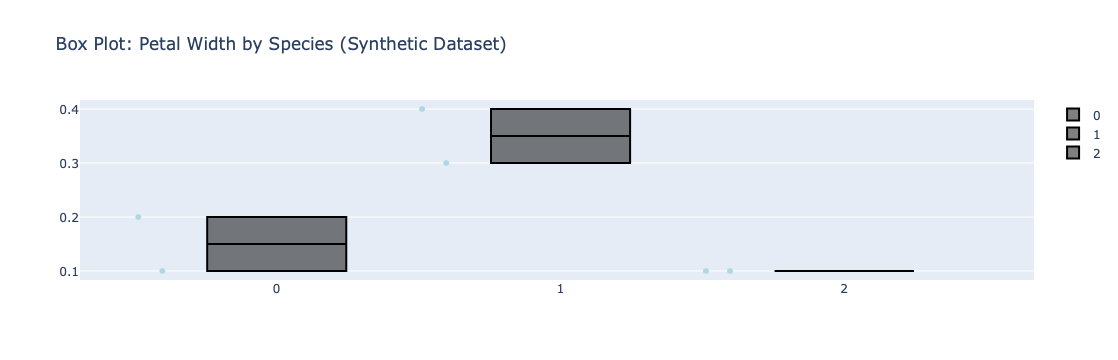

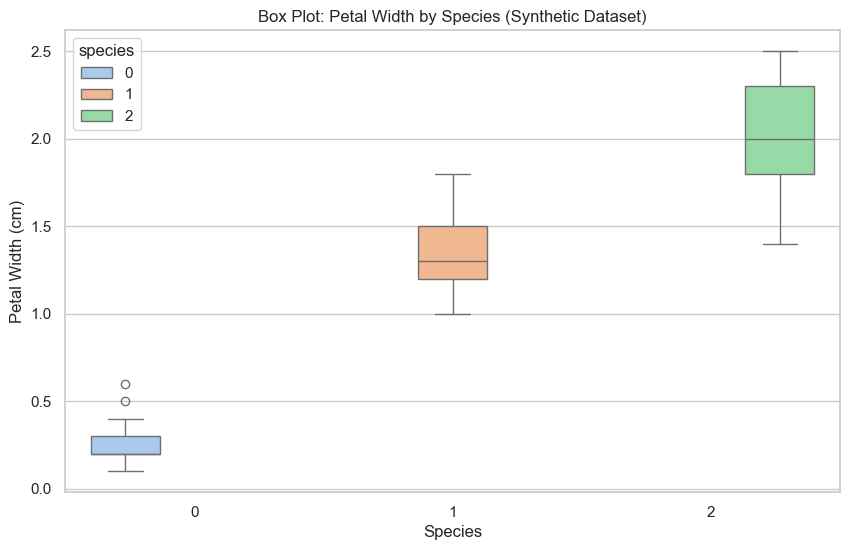

In [132]:
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x='species', y='petal width (cm)', data=df_synthetic, palette='pastel', hue='species', dodge=True)
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')
plt.title('Box Plot: Petal Width by Species (Synthetic Dataset)')

# Get the box data using Seaborn's get_lines function
box_data = [line.get_ydata() for line in box_plot.get_lines()]

# Create a Plotly box trace for each species
box_traces = []
for i, species in enumerate(df_synthetic['species'].unique()):
    trace = go.Box(
        x=[str(species)] * len(box_data[i]),  # Convert to string here
        y=box_data[i],
        boxpoints='all',
        jitter=0.3,
        pointpos=-1.8,
        line=dict(color='black'),
        marker_color='lightblue',  # Directly specify the color here
        name=str(species)  # Convert to string here
    )
    box_traces.append(trace)

# Create a Plotly figure
chart_six = go.Figure(data=box_traces)

# Update layout of the Plotly figure
chart_six.update_layout(title_text='Box Plot: Petal Width by Species (Synthetic Dataset)')

# Show the Plotly figure
chart_six.show()

/var/folders/8x/_35lzhpn3_z2h2dp_j_4ysrm0000gn/T/ipykernel_2761/3528144852.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




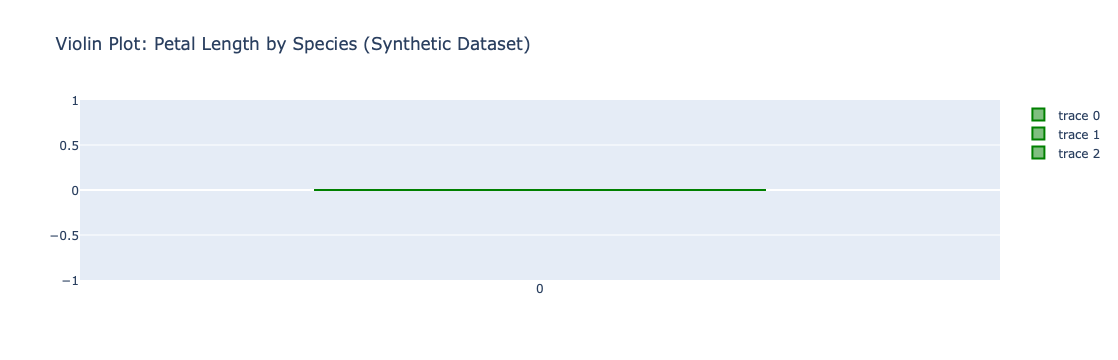

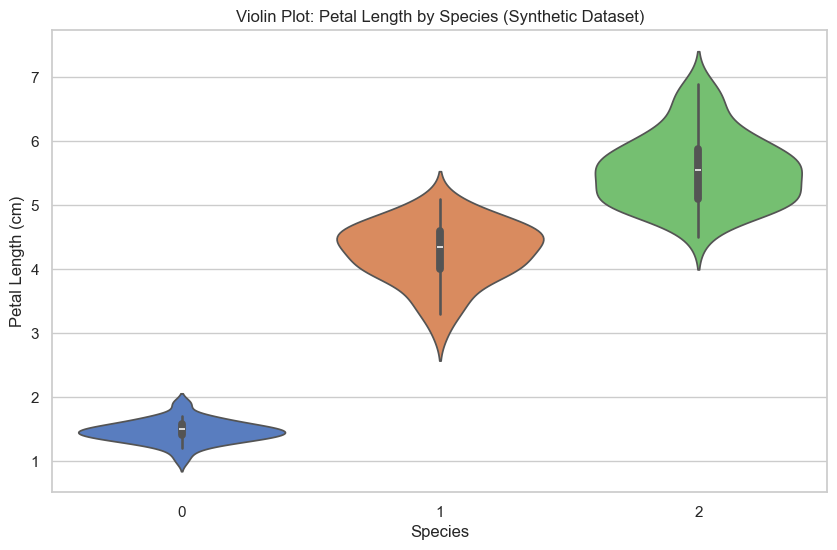

In [133]:
plt.figure(figsize=(10, 6))
violin_plot = sns.violinplot(x='species', y='petal length (cm)', data=df_synthetic, palette='muted')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.title('Violin Plot: Petal Length by Species (Synthetic Dataset)')

# Extract data from Seaborn violin plot using get_offsets()
violin_data = [patch.get_offsets() for patch in violin_plot.collections]

# Create a Plotly figure using make_subplots
chart_seven = make_subplots(rows=1, cols=1)
for data in violin_data:
    chart_seven.add_trace(go.Violin(x=data[:, 0], y=data[:, 1], box_visible=True, line_color='green'), row=1, col=1)

# Update layout of the Plotly figure
chart_seven.update_layout(title_text='Violin Plot: Petal Length by Species (Synthetic Dataset)')

# Show the Plotly figure
chart_seven.show()

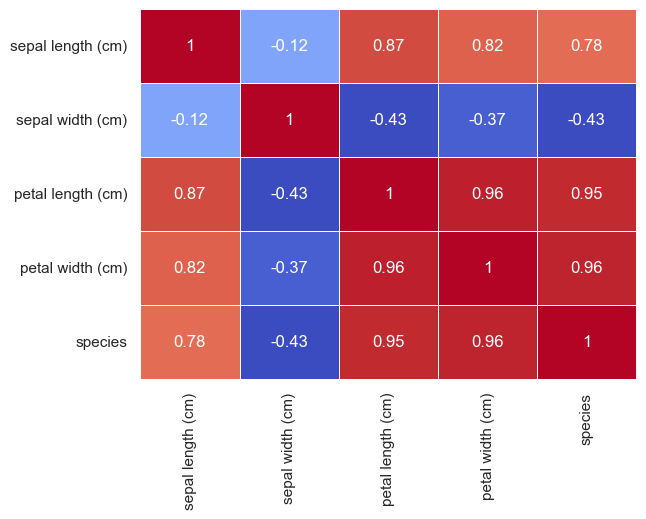

In [134]:
chart_eight = sns.heatmap(df_synthetic.corr(), annot=True, cmap='coolwarm', linewidths=.5, cbar=False)


In [135]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objs as go

# Assuming chart_seven is your Plotly figure
# You can replace this with your actual chart variable
chart_one = go.Figure()
chart_two = go.Figure()
chart_three = go.Figure()
chart_four = go.Figure()
chart_five = go.Figure()
chart_six = go.Figure()
chart_seven = go.Figure()
chart_eight = go.Figure()

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    # Add a Plotly chart using dcc.Graph component
    dcc.Graph(
        id='my-chart',
        figure=chart_one
    ),

      dcc.Graph(
        id='my-chart1',
        figure=chart_two
    ),

      dcc.Graph(
        id='my-chart2',
        figure=chart_three
    ),

      dcc.Graph(
        id='my-chart3',
        figure=chart_four
    ),

      dcc.Graph(
        id='my-chart4',
        figure=chart_five
    ),

      dcc.Graph(
        id='my-chart5',
        figure=chart_six
    ),

      dcc.Graph(
        id='my-chart6',
        figure=chart_seven
      ),

      dcc.Graph(
        id='my-chart7',
        figure=chart_eight
    ),
])

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


/var/folders/8x/_35lzhpn3_z2h2dp_j_4ysrm0000gn/T/ipykernel_2761/1378482506.py:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/8x/_35lzhpn3_z2h2dp_j_4ysrm0000gn/T/ipykernel_2761/1378482506.py:50: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



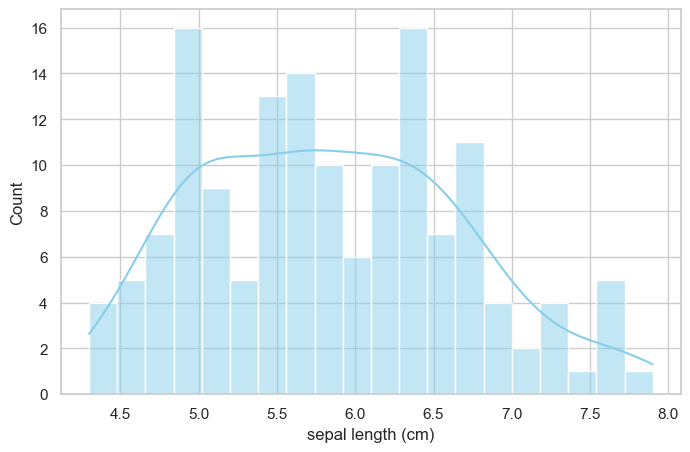

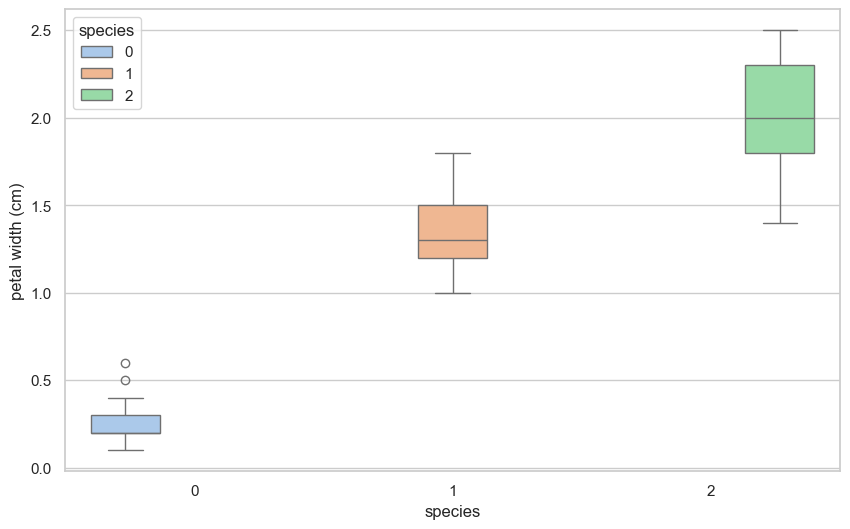

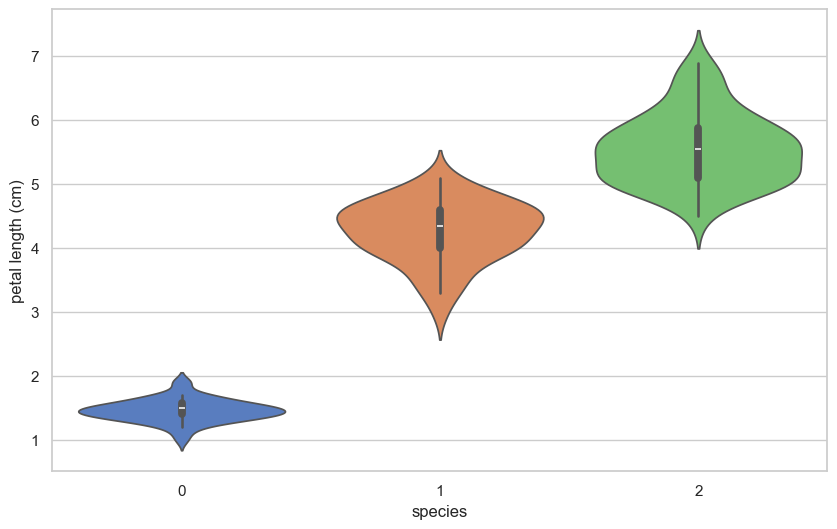

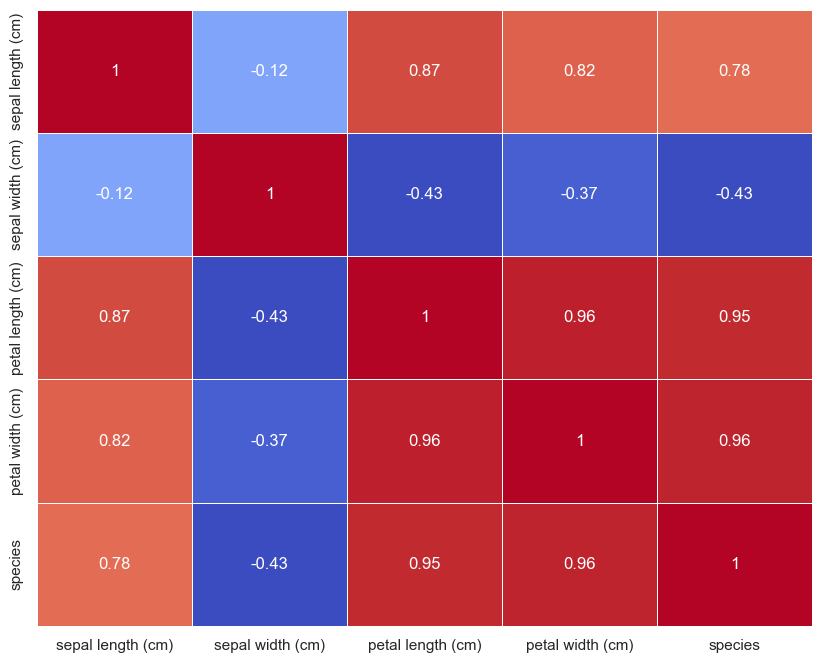

In [144]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
from plotly.subplots import make_subplots

# Load the synthetic dataset
iris = load_iris()
df_synthetic = pd.concat([pd.DataFrame(iris.data, columns=iris.feature_names), pd.Series(iris.target, name='species')], axis=1)

# Scatter Plot
scatter_data = df_synthetic[['sepal length (cm)', 'petal length (cm)', 'species']]

# Line Plot
line_data = df_synthetic[['sepal length (cm)', 'species']].head(50)

# Bar Plot
mean_sepal_length = df_synthetic.groupby('species')['sepal length (cm)'].mean()

# Pie Chart
species_distribution = df_synthetic['species'].value_counts()

# Histogram
plt.figure(figsize=(8, 5))
ax = sns.histplot(df_synthetic, x='sepal length (cm)', kde=True, bins=20, color='skyblue')
bin_edges = [patch.get_x() for patch in ax.patches] + [ax.patches[-1].get_x() + ax.patches[-1].get_width()]
frequencies, _ = np.histogram(df_synthetic['sepal length (cm)'], bins=bin_edges)
histogram_data = {'bin_edges': bin_edges, 'frequencies': frequencies}

# Box Plot
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x='species', y='petal width (cm)', data=df_synthetic, palette='pastel', hue='species', dodge=True)
box_data = [line.get_ydata() for line in box_plot.get_lines()]

# Violin Plot
plt.figure(figsize=(10, 6))
violin_plot = sns.violinplot(x='species', y='petal length (cm)', data=df_synthetic, palette='muted')
violin_data = [patch.get_offsets() for patch in violin_plot.collections]

# Heatmap
plt.figure(figsize=(10, 8))
chart_eight = sns.heatmap(df_synthetic.corr(), annot=True, cmap='coolwarm', linewidths=.5, cbar=False)

# Get the color values from the Viridis colorscale
viridis_colors = plt.cm.get_cmap('viridis', 256)
colorscale = [[i / 256, viridis_colors(i)[:3]] for i in range(256)]

# Create a Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    # Scatter Plot
    dcc.Graph(
        id='scatter-plot',
        figure={
            'data': [
                go.Scatter(
                    x=scatter_data[scatter_data['species'] == species]['sepal length (cm)'],
                    y=scatter_data[scatter_data['species'] == species]['petal length (cm)'],
                    mode='markers',
                    marker=dict(
                        size=8,
                    ),
                    name=f'Species {species}',
                ) for species in df_synthetic['species'].unique()
            ],
            'layout': go.Layout(
                title='Scatter Plot: Sepal Length vs. Petal Length (Synthetic Dataset)',
                xaxis=dict(title='Sepal Length (cm)'),
                yaxis=dict(title='Petal Length (cm)'),
            ),
        },
    ),

    # Line Plot
    dcc.Graph(
        id='line-plot',
        figure={
            'data': [
                go.Scatter(
                    x=line_data[line_data['species'] == species].index,
                    y=line_data[line_data['species'] == species]['sepal length (cm)'],
                    mode='lines+markers',
                    marker=dict(
                        color='blue',
                    ),
                    line=dict(
                        color='blue',
                        width=2,
                    ),
                    name=f'Species {species}',
                ) for species in df_synthetic['species'].unique()
            ],
            'layout': go.Layout(
                title='Line Plot: Sepal Length over the first 50 samples (Synthetic Dataset)',
                xaxis=dict(title='Samples'),
                yaxis=dict(title='Sepal Length (cm)'),
            ),
        },
    ),

    # Bar Plot
    dcc.Graph(
        id='bar-plot',
        figure={
            'data': [
                go.Bar(
                    x=mean_sepal_length.index,
                    y=mean_sepal_length.values,
                    marker=dict(color=sns.color_palette('viridis')),
                    name='Mean Sepal Length',
                ),
            ],
            'layout': go.Layout(
                title='Bar Plot: Mean Sepal Length per Species (Synthetic Dataset)',
                xaxis=dict(title='Species'),
                yaxis=dict(title='Mean Sepal Length (cm)'),
            ),
        },
    ),

    # Pie Chart
    dcc.Graph(
        id='pie-chart',
        figure={
            'data': [
                go.Pie(
                    labels=species_distribution.index,
                    values=species_distribution.values,
                    marker=dict(colors=['lightcoral', 'lightgreen', 'lightblue']),
                    textinfo='percent+label',
                    hole=0.3,
                ),
            ],
            'layout': go.Layout(
                title='Pie Chart: Distribution of Species (Synthetic Dataset)',
            ),
        },
    ),

    # Histogram
    dcc.Graph(
        id='histogram',
        figure={
            'data': [
                go.Bar(
                    x=histogram_data['bin_edges'],
                    y=histogram_data['frequencies'],
                    marker_color='skyblue',
                ),
            ],
            'layout': go.Layout(
                title='Histogram: Sepal Length Distribution (Synthetic Dataset)',
                xaxis=dict(title='Sepal Length (cm)'),
                yaxis=dict(title='Frequency'),
            ),
        },
    ),

    # Box Plot
    dcc.Graph(
        id='box-plot',
        figure={
            'data': [
                go.Box(
                    x=[str(species)] * len(box_data[i]),
                    y=box_data[i],
                    boxpoints='all',
                    jitter=0.3,
                    pointpos=-1.8,
                    line=dict(color='black'),
                    marker_color='lightblue',
                    name=str(species),
                ) for i, species in enumerate(df_synthetic['species'].unique())
            ],
            'layout': go.Layout(
                title='Box Plot: Petal Width by Species (Synthetic Dataset)',
                xaxis=dict(title='Species'),
                yaxis=dict(title='Petal Width (cm)'),
            ),
        },
    ),

    # Violin Plot
    dcc.Graph(
        id='violin-plot',
        figure={
            'data': [
                go.Violin(
                    x=[str(species)] * len(violin_data[i][:, 0]),
                    y=violin_data[i][:, 1],
                    box_visible=True,
                    line_color='green',
                    name=str(species),
                ) for i, species in enumerate(df_synthetic['species'].unique())
            ],
            'layout': go.Layout(
                title='Violin Plot: Petal Length by Species (Synthetic Dataset)',
                xaxis=dict(title='Species'),
                yaxis=dict(title='Petal Length (cm)'),
            ),
        },
    ),

    # Heatmap
    

])

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)
